# Module 2.2 — Same Expectancy, Wildly Different Lives
### pre-simulation beliefs

1. Expectancy should dominate experience
   - If all agents have the same positive expectancy and enough trades, their equity curves should look broadly similar, just shifted slightly.  

2. Early performance is informative
   - if a system is *"good,"* it should show itself relatively early. Long early drawdowns would feel like evidence of a problem.
   - Short-term experience reflects long-term truth.

3. Discipline should equalize outcomes.
   - Traders who follow identical rules with identical edge should live roughly comparable emotional and financial lives.
   - correct behavior produces fair outcomes.  

4. Worst case should be rare and obviously extreme.
   - Truly bad equity paths should be outliers, easy to mentally desmiss.  

    
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.55
n_trades = 1000

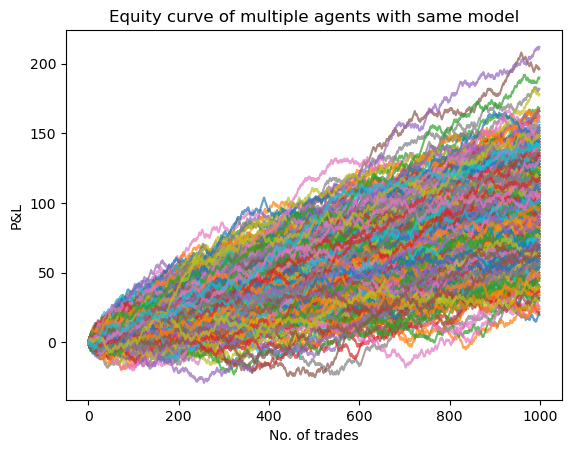

In [2]:
def run_simulation(p, n_trades):
    outcomes = np.where(np.random.rand(n_trades) < p, 1, -1)
    path =  outcomes.cumsum()
    return path, outcomes

n_agents = 500
final_equities = []
all_paths = []
all_raw_outcomes = []

plt.figure()
for _ in range(n_agents):
    path, outcomes = run_simulation(p, n_trades)
    all_raw_outcomes.append(outcomes)
    all_paths.append(path)
    final_equities.append(path[-1])
    plt.plot(path, alpha = 0.7)

plt.xlabel('No. of trades')
plt.ylabel('P&L')
plt.title('Equity curve of multiple agents with same model')
plt.show()

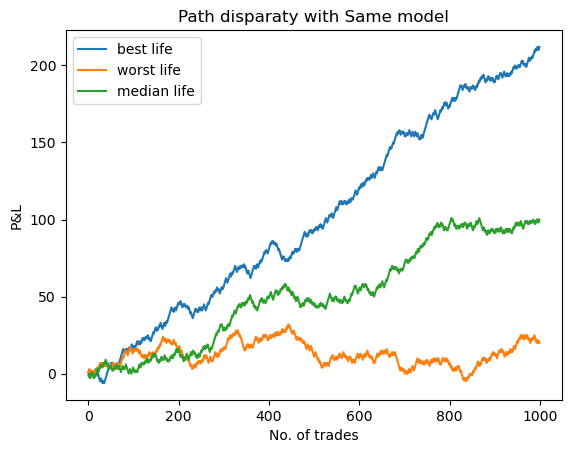

In [3]:
all_paths = np.array(all_paths)
final_equities = np.array(final_equities)

best_path = all_paths[np.argmax(all_paths[:, -1])]
worst_path = all_paths[np.argmin(all_paths[:, -1])]
median_path = all_paths[np.argsort(all_paths[:, -1])[n_agents // 2]]

plt.figure()
plt.plot(best_path , label = 'best life')
plt.plot(worst_path, label = 'worst life')
plt.plot(median_path, label = 'median life')
plt.legend()

plt.xlabel('No. of trades')
plt.ylabel('P&L')
plt.title('Path disparaty with Same model')

plt.show()

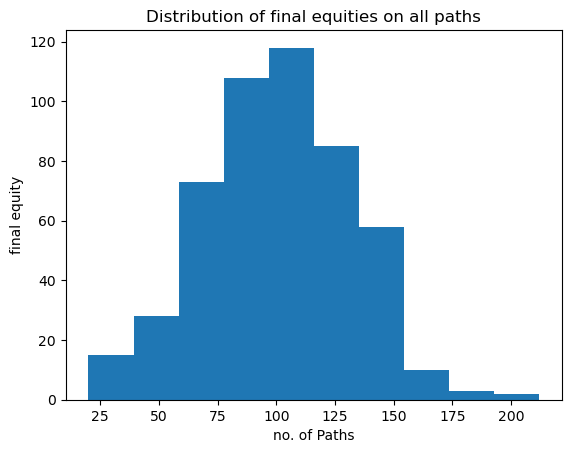

In [4]:
plt.figure()
plt.hist(final_equities)
plt.title('Distribution of final equities on all paths')
plt.xlabel('no. of Paths')
plt.ylabel('final equity')
plt.show()

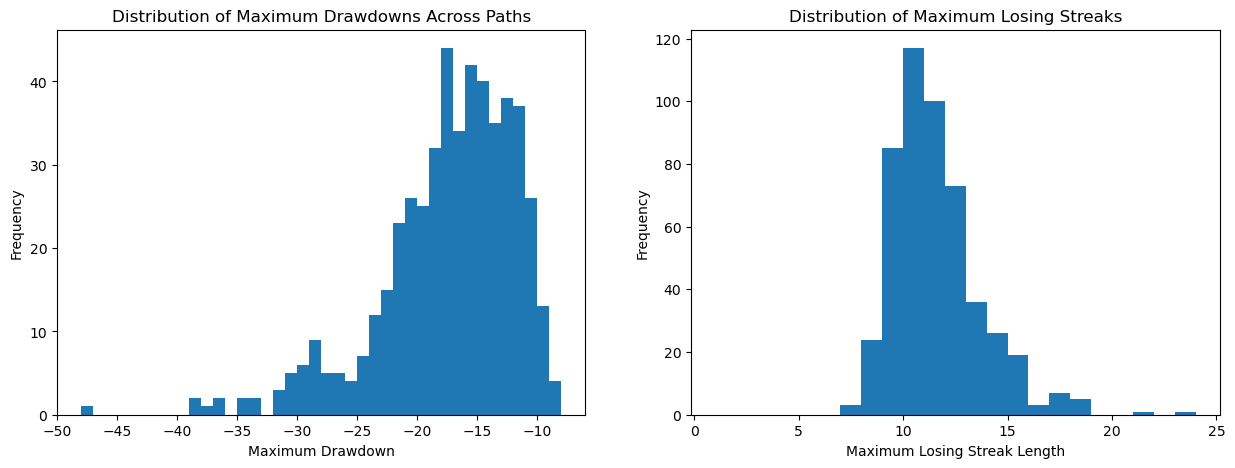

In [5]:
all_raw_outcomes = np.array(all_raw_outcomes)

def max_drawdown(path):
    peak = path[0]
    max_dd = 0

    for x in path:
        peak = max(peak, x)
        max_dd = min(max_dd , x-peak)

    return max_dd

def max_streak(seq):
    max_streak = 1
    current_streak = 1

    for i in range(1, len(seq)):
        if seq[i] == seq[i-1]:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 1
    return max_streak


def max_losing_streak(seq):
    losses = (seq == -1).astype(int)
    return max_streak(losses)

max_dds = np.array([max_drawdown(p) for p in all_paths])
max_ls  = np.array([max_losing_streak(seq) for seq in all_raw_outcomes])

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (15, 5))
ax[0].hist(max_dds, bins=40)
ax[0].set_xlabel("Maximum Drawdown")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Maximum Drawdowns Across Paths")



ax[1].hist(max_ls, bins = range(1, max(max_ls+2)))
ax[1].set_xlabel('Maximum Losing Streak Length')
ax[1].set_ylabel('Frequency')
ax[1].set_title("Distribution of Maximum Losing Streaks")


plt.show()

# Observation
### Despite universal profitability at the terminal point, path-dependent stress metrics such as maximum drawdown and losing streak length remain severe and comparable to near-fair systems. This demonstrates that expectancy governs destination, not journey. Psychological pressure is therefore not a signal of system failure, but a natural consequence of variance acting over time.